In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Carga y exploracion del dataset

In [71]:
dtrain =  pd.read_csv('../../../data/human_activity_recognition/train.csv')
dtest =  pd.read_csv('../../../data/human_activity_recognition/test.csv')

dtrain.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [72]:
# Se comprueban que no existan valores nulos en train
qsna=dtrain.shape[0]-dtrain.isnull().sum(axis=0)
qna=dtrain.isnull().sum(axis=0)
ppna=round(100*(dtrain.isnull().sum(axis=0)/dtrain.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
tBodyAcc-mean()-X,7352,0,0.0
fBodyAccJerk-kurtosis()-Y,7352,0,0.0
fBodyAccJerk-meanFreq()-X,7352,0,0.0
fBodyAccJerk-meanFreq()-Y,7352,0,0.0
fBodyAccJerk-meanFreq()-Z,7352,0,0.0
fBodyAccJerk-skewness()-X,7352,0,0.0
fBodyAccJerk-kurtosis()-X,7352,0,0.0
fBodyAccJerk-skewness()-Y,7352,0,0.0
fBodyAccJerk-skewness()-Z,7352,0,0.0
fBodyAccJerk-maxInds-Y,7352,0,0.0


* No se econtraron valores nulos en train

In [73]:
# Se comprueban que no existan valores nulos en test
qsna=dtest.shape[0]-dtest.isnull().sum(axis=0)
qna=dtest.isnull().sum(axis=0)
ppna=round(100*(dtest.isnull().sum(axis=0)/dtest.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
tBodyAcc-mean()-X,2947,0,0.0
fBodyAccJerk-kurtosis()-Y,2947,0,0.0
fBodyAccJerk-meanFreq()-X,2947,0,0.0
fBodyAccJerk-meanFreq()-Y,2947,0,0.0
fBodyAccJerk-meanFreq()-Z,2947,0,0.0
fBodyAccJerk-skewness()-X,2947,0,0.0
fBodyAccJerk-kurtosis()-X,2947,0,0.0
fBodyAccJerk-skewness()-Y,2947,0,0.0
fBodyAccJerk-skewness()-Z,2947,0,0.0
fBodyAccJerk-maxInds-Y,2947,0,0.0


* No se encontraron valores nulos en test

### Identificacion de variables sensoriales

In [74]:
train_sensor_data = dtrain.drop(columns=['Activity', 'subject'])
test_sensor_data = dtest.drop(columns=['Activity', 'subject'])

### Normalizacion de variables sensoriales

In [75]:
scaler = StandardScaler()
train_sensor_data_normalized = scaler.fit_transform(train_sensor_data)
test_sensor_data_normalized = scaler.transform(test_sensor_data)

### Analisis no supervisado

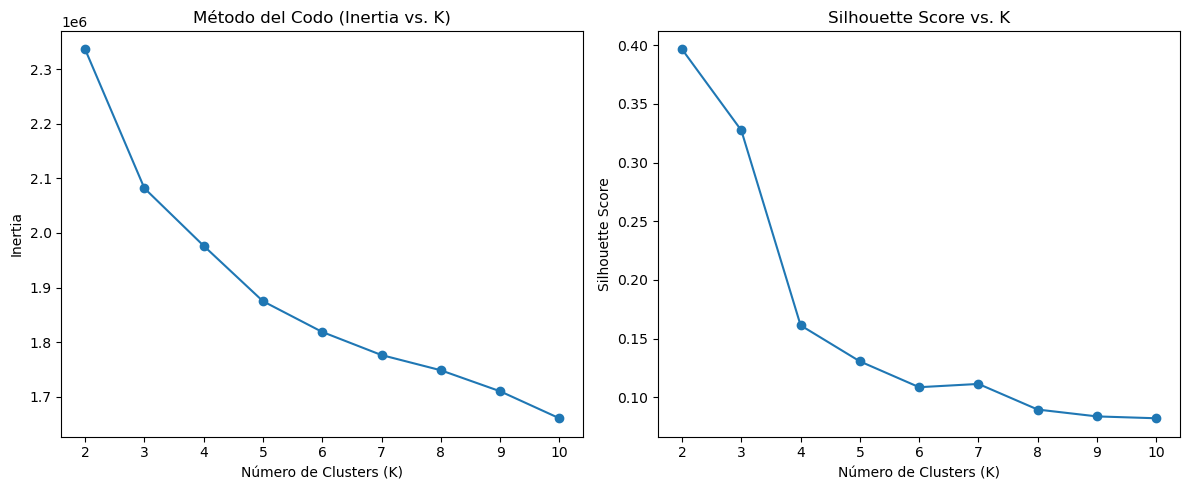

In [76]:
# Calcular el mejor valor para K 
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_sensor_data_normalized)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(train_sensor_data_normalized, kmeans.labels_))

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

* Se determina que el mejor valor de k esta entre 4 y 5 de acuerdo al metodo del codo

In [77]:
# Análisis no supervisado usando K-means en el dataset de entrenamiento
kmeans = KMeans(n_clusters=4, random_state=42)
train_clusters = kmeans.fit_predict(train_sensor_data_normalized)

# Añadir clusters al dataset de entrenamiento
dtrain['cluster'] = train_clusters

# Analizar si los clusters corresponden a los tipos de actividad
print(pd.crosstab(dtrain['Activity'], dtrain['cluster']))

# Calcular la inercia
inertia = kmeans.inertia_
print(f'\nInercia: {inertia}')

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(train_sensor_data_normalized, train_clusters)
print(f'\nSilhouette Score: {silhouette_avg}')


cluster               0    1    2    3
Activity                              
LAYING              917    8    0  482
SITTING             829    1    0  456
STANDING            749    0    0  625
WALKING               0  911  315    0
WALKING_DOWNSTAIRS    0  452  534    0
WALKING_UPSTAIRS      0  967  103    3

Inercia: 1976475.199951482

Silhouette Score: 0.16133206170423278


* Cluster 0:

Principalmente actividades de LAYING (917), SITTING (829), y STANDING (749).
Este cluster agrupa actividades estáticas.

* Cluster 1:

Principalmente actividades de WALKING (911), WALKING_DOWNSTAIRS (452), y WALKING_UPSTAIRS (967).
Este cluster agrupa actividades de movimiento.

* Cluster 2:

Mezcla de WALKING (315), WALKING_DOWNSTAIRS (534), y WALKING_UPSTAIRS (103).
Este cluster también agrupa actividades de movimiento, aunque con menos claridad.

* Cluster 3:

Principalmente LAYING (482), SITTING (456), y STANDING (625).
Este cluster agrupa actividades estáticas.

* Clusters 0 y 3: Agrupan principalmente actividades estáticas como LAYING, SITTING, y STANDING.
* Clusters 1 y 2: Agrupan principalmente actividades de movimiento como WALKING, WALKING_DOWNSTAIRS, y WALKING_UPSTAIRS.

In [78]:
# Preparar datos para el modelo MLP
X_train = train_sensor_data_normalized
y_train = dtrain['Activity']
X_test = test_sensor_data_normalized
y_test = dtest['Activity']

# Configurar la arquitectura del MLP y los hiperparámetros
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, batch_size=32, learning_rate_init=0.001, random_state=42)

# Entrenar el modelo MLP
mlp.fit(X_train, y_train)

# Evaluar el modelo
y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))



                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.87      0.97      0.92       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.94      0.95      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



Evaluación del Modelo

Métricas de Rendimiento:

* Precisión: El modelo tiene una precisión general del 95%, lo que indica que predice correctamente la mayoría de las actividades.
* Recall: El recall también es alto en general, con un valor promedio del 95%, lo que significa que el modelo identifica correctamente la mayoría de las instancias de cada actividad.
* F1-Score: El F1-score promedio es del 95%, lo que muestra un buen equilibrio entre precisión y recall.

* Desempeño por Actividad:

* LAYING: F1-score de 0.98, lo que indica un excelente desempeño en la predicción de esta actividad.
* SITTING: F1-score de 0.92, con un recall de 0.88, lo que sugiere que algunas instancias de "SITTING" pueden estar siendo clasificadas incorrectamente.
* STANDING: F1-score de 0.92, con un recall de 0.97, lo que indica que el modelo identifica correctamente la mayoría de las instancias de "STANDING".
* WALKING: F1-score de 0.97, lo que muestra un excelente desempeño en la predicción de esta actividad.
* WALKING_DOWNSTAIRS: F1-score de 0.95, con un recall de 0.93, lo que indica un buen desempeño en general.
* WALKING_UPSTAIRS: F1-score de 0.95, con un recall de 0.95, lo que muestra un buen equilibrio entre precisión y recall.

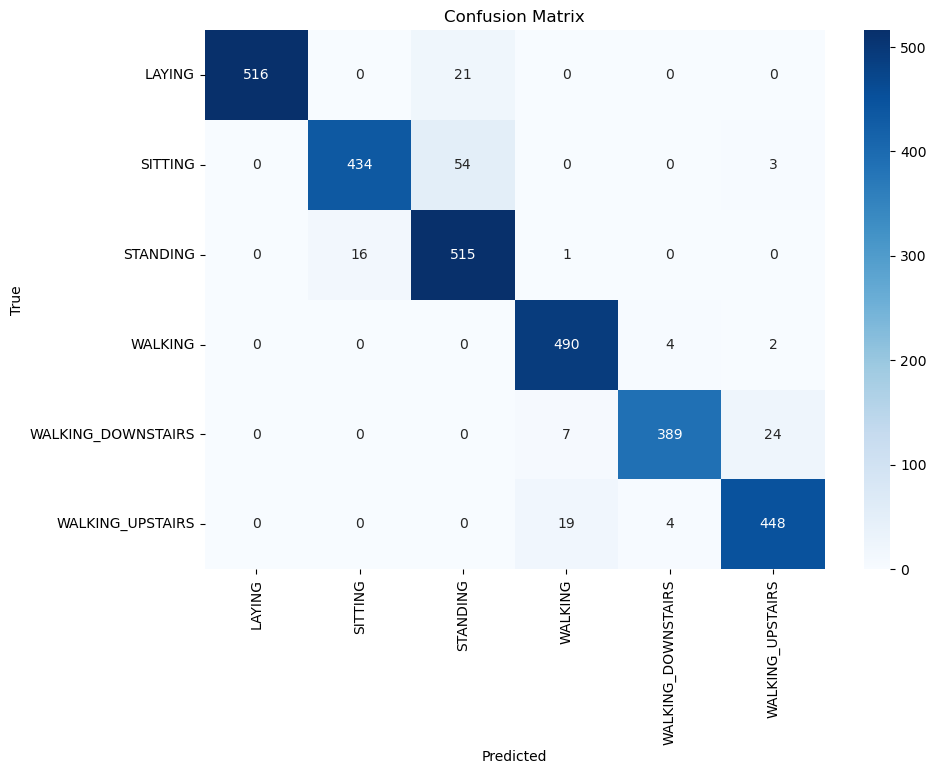

In [79]:
# Definir las etiquetas de las actividades
activity_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=activity_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels, yticklabels=activity_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Matriz de Confusión:

* La matriz de confusión muestra que la mayoría de las predicciones están en la diagonal principal, lo que indica predicciones correctas.

Algunas confusiones notables:

 * SITTING y STANDING: Hay algunas instancias de "SITTING" clasificadas como "STANDING" y viceversa.
 * WALKING_UPSTAIRS: Algunas instancias están clasificadas incorrectamente como "WALKING".

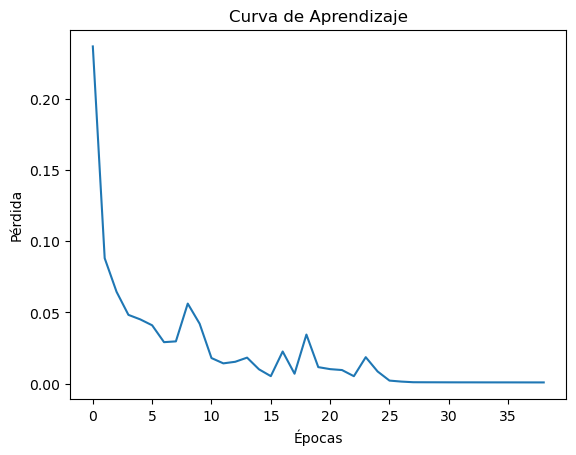

In [80]:
# Visualizar curvas de aprendizaje
plt.plot(mlp.loss_curve_)
plt.title('Curva de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()


* La curva comienza con un valor alto de pérdida, lo cual es de esperarse al inicio del entrenamiento, cuando el modelo aún no ha aprendido los patrones en los datos.
* A medida que avanza el entrenamiento, la pérdida disminuye rápidamente durante las primeras épocas, indicando que el modelo está aprendiendo de manera efectiva.
* Alrededor de la época 10, se observa un pequeño pico o aumento temporal en la pérdida. Esto podría sugerir algún problema en el entrenamiento, como un posible sobreajuste o una configuración subóptima de los hiperparámetros.
* Después de este punto, la curva continúa disminuyendo de manera más estable, aunque a una tasa más lenta, a medida que el modelo se acerca a un nivel de rendimiento óptimo.


### Analisis y discusion de los resultados del modelo


* Agrupación de Actividades: El análisis de clusters con K-means mostró que las actividades físicas pueden agruparse en clusters distintos, aunque no perfectamente. Las actividades estáticas como LAYING, SITTING y STANDING tendieron a agruparse juntas, mientras que las actividades de movimiento como WALKING, WALKING_DOWNSTAIRS y WALKING_UPSTAIRS formaron otros clusters.
* Separación de Clusters: Aunque los clusters no estaban perfectamente definidos (como lo indican los valores de Silhouette Score), el análisis proporcionó una base para entender cómo se distribuyen las actividades en el espacio de características.

Características Importantes:

* Aceleración y Velocidad Angular: Las lecturas triaxiales del acelerómetro y el giroscopio son cruciales para distinguir entre actividades estáticas y dinámicas. Por ejemplo, la aceleración en los ejes X, Y y Z puede diferenciar entre estar sentado y caminando.
* Variables de Dominio de Tiempo y Frecuencia: Las características derivadas en el dominio del tiempo y la frecuencia (561 características) también son importantes para capturar patrones específicos de cada actividad.

Rendimiento Actual:

* Precisión General: El modelo MLP mostró una precisión general del 95%, lo cual es bastante bueno. Las actividades como LAYING y WALKING tuvieron un rendimiento excelente, mientras que SITTING y STANDING presentaron algunas confusiones.
* Matriz de Confusión: La matriz de confusión mostró que la mayoría de las predicciones estaban correctas, aunque hubo algunas confusiones entre actividades similares, como SITTING y STANDING.

Mejoras Potenciales:

* Ajuste de Hiperparámetros: Experimentar con diferentes configuraciones de hiperparámetros (número de neuronas, capas ocultas, tasa de aprendizaje) podría mejorar el rendimiento.
* Ingeniería de Características: Crear nuevas características o seleccionar las más relevantes podría ayudar a mejorar la precisión del modelo.

Adecuación del Enfoque:

* Datos Sensoriales: El uso de un MLP es adecuado para predecir actividades basadas en datos sensoriales, ya que puede capturar patrones complejos en los datos.